# M1 Layer 2/3 Connectivity doc
#### Updated 5/22/24
## PN2PN connectivity bio data
L2/3 PRC to L2/3 PRC 8/240 Hirai et al 2012 = 3.3%

Holmgren et al 2003 states "Within a cylindrical volume of 400 mm w 200 mm containing 2512 pyramidal cells, the central cell may receive inputs from 58 other pyramidal cells, giving an average connection probability of about 2%." Holmgren et al 2003 Also has the two following figures which show connectivity 

![image name](PN-conn.png) 
![image name](PN-connvergence.png)

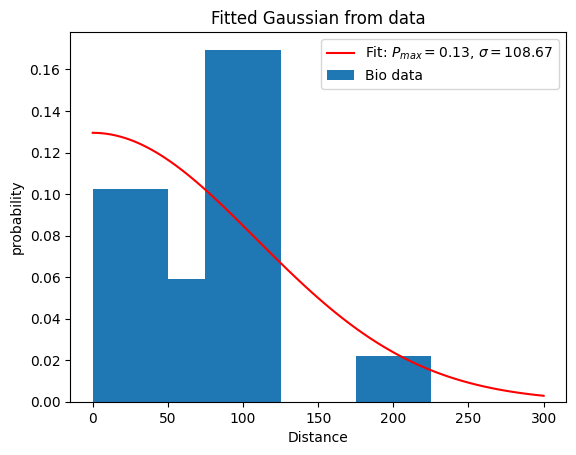

In [1]:
import connectionUtiles
import warnings
warnings.filterwarnings("ignore")
import numpy as np
data_config_PN2PN = np.array(((25, 4, 39),
                               (50, 7, 118),
                               (100,20,118),
                               (200,26,1184)))
_ = connectionUtiles.fit_data(data_config_PN2PN)

Pmax (max probability): 0.07877538510991813
Standard deviation: 78.78697773824753
R-squared: 0.8828332208633329


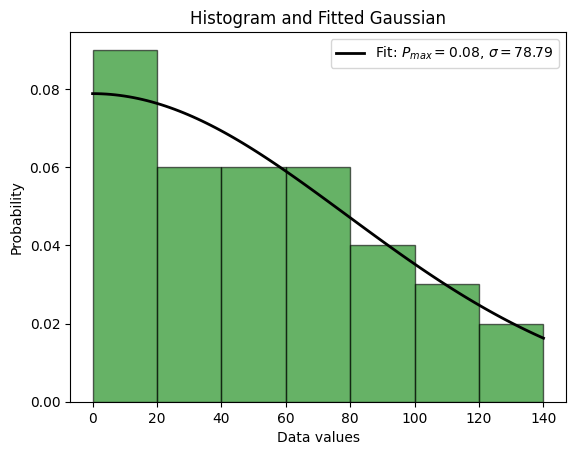

In [2]:
hist_data = np.array([[0, 20, 0.09], [20, 40, 0.06], [40, 60, 0.06], [60, 80, 0.06],[80,100,0.04],[100,120,0.03],[120,140,0.02]])
_ = connectionUtiles.histoFit(hist_data)

In [3]:
connectionUtiles.networkTest(num_cells=2512,width=400,height=200,Pmax=0.08,sigma=78)

Number of connections: 93
Percent connectivity: 3.70%


## PN2FSI and FSI2PN connectivity bio data
 Holmgren et al 2003 states "In a cylindrical volume of 200 mm w 200 mm containing 628 pyramidal cells, we calculated that 492 pyramids innervate a given interneuron, 487 pyramids receive inhibitory inputs from the same interneuron, and 432 pyramids are reciprocally connected to this interneuron. Within the same volume, a pyramidal cell may receive synaptic inputs from only 33 other pyramidal cells."

![image name](PN2FSI-connvergence.png)

This figure is only the reciprocal connection for PN2FSI pair

![image name](PN2FSI-conn.png)

### First lets focus on PN2FSI

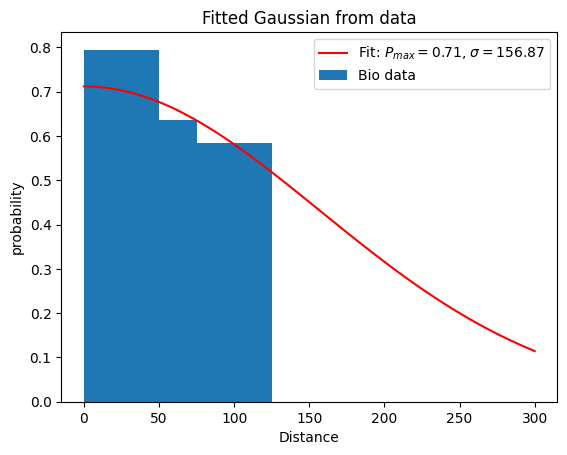

In [4]:
import connectionUtiles
import numpy as np
data_config_PN2FSI = np.array(((25, 31, 39),
                               (50, 75, 118),
                               (100, 275, 471)))
_ = connectionUtiles.fit_data(data_config_PN2FSI)

In [5]:
connectionUtiles.networkTest(num_cells=628,width=200,height=200,Pmax=0.71,sigma=156)

Number of connections: 404
Percent connectivity: 64.33%


While a Pmax of 0.71 and a sigma of 156 match the report connectivity closely I believe that the sigma value is being over estimated and will result in a extremely large connectivity number when taken to 300um connection range. Instead i will use the fitted Pmax, but the sigma from the Allen paper for E2I connections. Another fix for this large sigma could be to remove the last data point in the data config. This will reduce the sigma significantly while keeping the Pmax similar.

In [6]:
connectionUtiles.networkTest(num_cells=628,width=200,height=200,Pmax=0.71,sigma=99.84) # sigma from Allen modeling paper

Number of connections: 339
Percent connectivity: 53.98%


This still gives a decent number of connections close to the report value, but when this rule is used in large distance depended model with 300um connection range it will result in a more realisitic number of connections.

### Now we go to FSI2PN

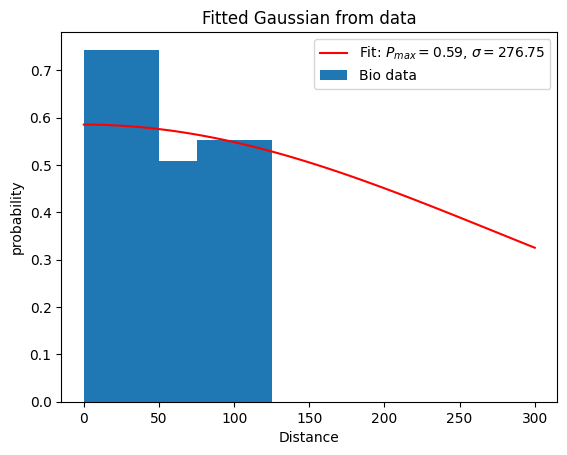

In [7]:
data_config_FSI2PN = np.array(((25, 29, 39),
                               (50, 60, 118),
                               (100, 260, 471)))
_ = connectionUtiles.fit_data(data_config_FSI2PN)

In [8]:
connectionUtiles.networkTest(num_cells=628,width=200,height=200,Pmax=0.59,sigma=276)

Number of connections: 358
Percent connectivity: 57.01%


Like above i believe the the sigma is being extremely overestimated for what is a good value for our model. I could either remove the last data point from the config, or use the Allen sigma. For now i will use the Allen sigma of 96 to match what I did for the PN2FSI case.

In [9]:
connectionUtiles.networkTest(num_cells=628,width=200,height=200,Pmax=0.59,sigma=96)

Number of connections: 267
Percent connectivity: 42.52%


### PN2FSI reciprocal connection
We have two different estimates we can use. We can either use the figure where the other data came from. There is also the second figure that just reports Pconn. Like above sigma is high and getting ride of the last point from the config almost exactly matches the data from the probability histogram

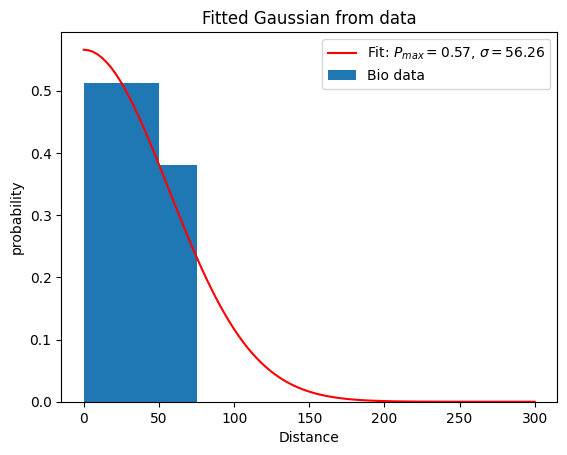

In [10]:
data_config_PN2FSI_RECI = np.array(((25, 20, 39),
                                    (50, 45, 118)))
                                    #(100, 120, 471)))
_ = connectionUtiles.fit_data(data_config_PN2FSI_RECI)

Pmax (max probability): 0.5639458003489634
Standard deviation: 56.62351413363471
R-squared: 0.9425867369854302


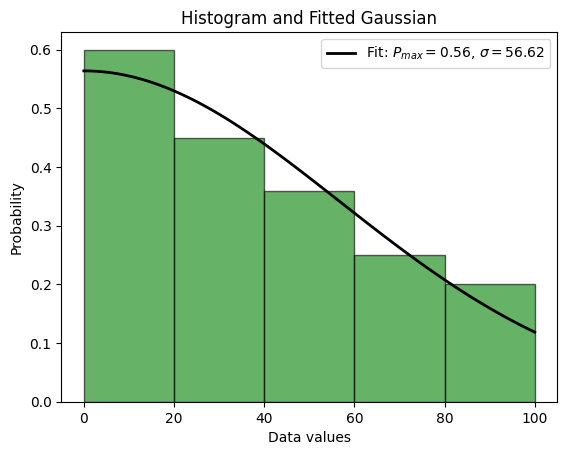

In [11]:
hist_data = np.array([[0, 20, 0.6], [20, 40, 0.45], [40, 60, 0.36], [60, 80, 0.25],[80,100,0.2]])
_ = connectionUtiles.histoFit(hist_data)

In [12]:
connectionUtiles.networkTest(num_cells=628,width=200,height=200,Pmax=0.56,sigma=56)

Number of connections: 133
Percent connectivity: 21.18%


## LTS2PN connectivity bio data
Fino et al 2011 states "These distributions demonstrated that the probability for interneurons to be connected decreases with intersomatic distance, peaking at less than 200 um and becoming negligible beyond 400 um. To better explore this, we plotted the connection probability within a 400 or 200 um radia from the PCs (Figure 4E) and observed that the connection probability was 0.48± 0.03 (n=61) within 400mm, but increased to 0.71± 0.03 (n = 61) within 200 mm". These numbers were very high, but from 2-photon experiments. They then paired patch clamped cells "For this purpose,we patched pairs of sGFP cells and PCs, selected randomly from a local population, to identify connected ones.From 40 pairs, 70% (n = 28) were mono-synaptically connected and 30% (n = 12)were unconnected".

The paper also states if one discards false positive responses, in 11/61 maps, every single tested interneuron in the near vicinity (<200 mm) of a PC were connected to it

This paper reports LTS2PN connections being very long range with some connections going over 600um. I have never heard of interneurons forming connections that far away with such high probability.

![image](LTS2PN.png)

Pmax (max probability): 0.6838686297481237
Standard deviation: 464.9987912450043
R-squared: 0.8133160340875438


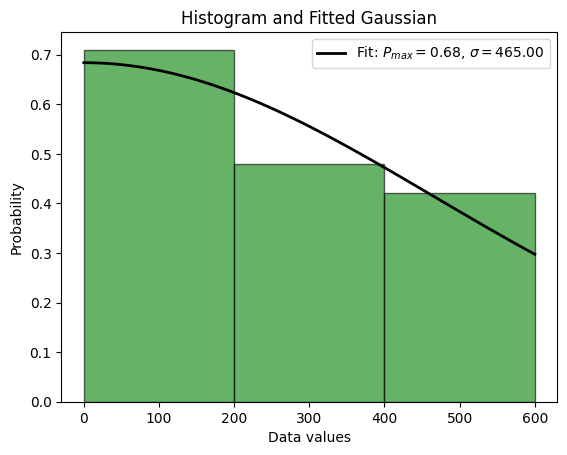

In [13]:
hist_data = np.array([[0,200,0.71], [200,400,0.48], [400,600,0.42]]) # rough estimates
_ = connectionUtiles.histoFit(hist_data)

Much like the PN2FSI and FSI2PN data it appears that the sigma value is extremely large. This makes sense since this paper is reporting such long range connections. For now i will just use the fitted Pmax, and use the Allen database sigma. This will also make the LTS2PN rule similar to the FSI2PN connection rule. This may be updated later.

## All Interneuron connections FSI2FSI,LTS2LTS,LTS2FSI, and FSI2LTS
The current plan for these connections is to use the same connectivity functions as the M1 L5 model unless i can find data that suggest it will be different in Layer 2/3. An important note this model is using the same connectivity function that Ziao created for his M1 layer 5 model. However due to different amounts of interneurons the convergence between interneurons is different. If we want to have the same convergence then functions will need to be changes slightly.

## Other network model's connectivity
I am still mining the data from other M1 network models but this is their connectivity. An important thing to note is I am not sure if this connectivity data they report is for possible connections (cells within distance rule) or for the whole cell population. 

![image](netpyne.png)

## Important data still missing
We still need to look at PN2LTS data.

## references
Dura-Bernal, S., Neymotin, S. A., Suter, B. A., Duguid, I., Shepherd, G. M. G., Lytton Correspondence, W. W., Dacre, J., Moreira, J. V. S., Urdapilleta, E., Schiemann, J., & Lytton, W. W. (2023). Multiscale model of primary motor cortex circuits predicts in vivo cell-type-specific, behavioral state-dependent dynamics. Cell Reports, 42. https://doi.org/10.1016/j.celrep.2023.112574

Fino, E., & Yuste, R. (2011). Article Dense Inhibitory Connectivity in Neocortex. Neuron, 69(6), 1188–1203. https://doi.org/10.1016/j.neuron.2011.02.025

Hirai, Y., Morishima, M., Karube, F., & Kawaguchi, Y. (2012). Specialized Cortical Subnetworks Differentially Connect Frontal Cortex to Parahippocampal Areas. The Journal of Neuroscience, 32(5), 1898. https://doi.org/10.1523/JNEUROSCI.2810-11.2012

Thomson, A. M., West, D. C., Wang, Y., & Bannister, A. P. (2002). Synaptic Connections and Small Circuits Involving Excitatory and Inhibitory Neurons in Layers 2–5 of Adult Rat and Cat Neocortex: Triple Intracellular Recordings and Biocytin Labelling In Vitro. Cerebral Cortex, 12(9), 936–953. https://doi.org/10.1093/CERCOR/12.9.936